In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# autoload self-written modules
%load_ext autoreload
%autoreload 2
import utils as ut

In [2]:
# read in data
data = pd.read_csv('data/2019Q2.csv')
data.rename(columns = {'Unnamed: 0': 'index'}, inplace=True)
data.set_index('index', inplace=True)
data

,y,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
537,-110.3538,-0.4654,2.2342,0.9850,1.9511,-0.1658,-0.8092,1.7976,0.0414,-0.5146,-0.1736,14.270,22.55,97.4639,655.7256,0.1038,0.1154,0.1463,0.0614,0.1926,0.0598,-0.4595,2.4092,0.5560,0.1254,-0.1620,-0.6190,2.1953,0.0881,-0.9329,-0.1629
90,-27.5923,-0.0919,0.7908,-1.0694,2.8166,-0.2146,-0.4380,0.4320,-2.0214,0.3094,-0.2231,14.640,15.24,85.0469,598.2026,0.1132,0.1339,0.0997,0.0706,0.2116,0.0635,0.1118,0.9681,-2.5703,2.1409,-0.3056,-0.0501,0.8011,-3.0428,1.0686,-0.3065
403,-62.4796,1.7309,0.1126,1.4137,4.7982,0.2451,1.3990,-0.2949,0.5099,2.5497,0.2423,12.960,18.29,82.5079,579.4802,0.0735,0.0790,0.0406,0.0188,0.1874,0.0590,2.8186,0.1481,1.5948,4.7171,0.5202,2.6686,-0.0413,1.1500,3.7316,0.5199
206,-28.9912,0.0404,-0.7302,1.0993,5.0327,0.7605,-0.3175,-1.1111,0.1256,2.3956,0.7551,15.120,16.68,103.5724,628.3163,0.0888,0.0959,0.0755,0.0408,0.1594,0.0599,-0.5274,-1.0156,1.3097,4.3397,1.5290,-0.6936,-1.1933,0.8295,3.2264,1.5285
227,-43.0480,-0.5495,1.6712,1.0893,0.2626,-0.1550,-0.8448,1.2862,0.2841,-1.5106,-0.1621,10.440,15.46,73.4141,248.8133,0.1053,0.0772,0.0066,0.0122,0.1788,0.0645,-0.5106,1.9536,0.8218,-1.0054,0.3357,-0.6396,1.7832,0.4258,-1.8217,0.3349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,NaN,0.8742,1.7252,1.3757,4.9808,-0.3252,0.4659,1.1892,0.2701,1.5215,-0.3311,19.530,32.47,122.5282,1259.0593,0.0842,0.1130,0.1145,0.0664,0.1428,0.0531,1.4955,1.8806,1.5149,4.6019,-0.2700,1.2995,1.6138,0.9730,3.2392,-0.2706
539,NaN,0.3014,0.3455,-1.1570,3.3204,1.0644,0.0455,-0.1594,-1.8497,2.0265,1.0630,7.729,25.49,50.5868,157.8279,0.0810,0.0488,0.0000,0.0000,0.1870,0.0728,0.6271,0.2587,-1.9759,3.6239,2.1203,0.5232,0.0253,-2.3099,2.9959,2.1201
265,NaN,-0.4229,1.7062,-0.0945,2.4438,-0.0629,-0.8075,1.2665,-1.1254,-0.5598,-0.0704,17.190,22.07,106.7595,916.4340,0.0973,0.0900,0.0906,0.0653,0.1867,0.0558,-0.7864,2.0236,-1.2723,1.2893,-0.2469,-0.9674,1.8115,-1.7806,0.0610,-0.2477


The image has been saved to 'images/heatmap.pdf'.


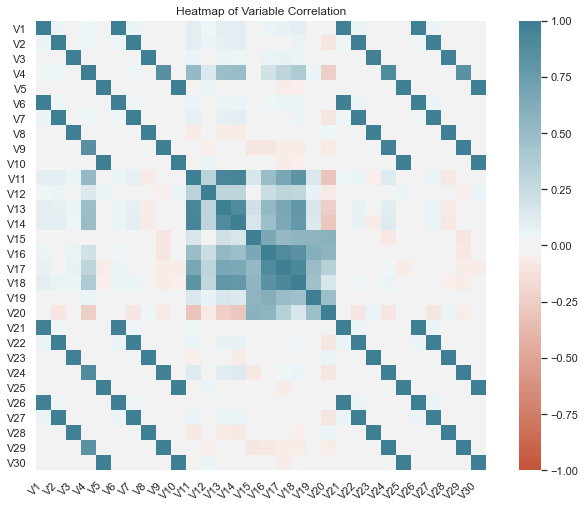

Grouping:
1: ['V1', 'V6', 'V21', 'V26']
2: ['V2', 'V7', 'V22', 'V27']
3: ['V3', 'V8', 'V23', 'V28']
4: ['V5', 'V10', 'V25', 'V30']
5: ['V9', 'V24', 'V29']
6: ['V11', 'V13', 'V14']
7: ['V17', 'V18']
Others: ['V4', 'V12', 'V15', 'V16', 'V19', 'V20']


In [3]:
# correlation heatamp
X = data.drop(columns = ['y'])
ut.show_corr(X, 0.9)

## Machine Learning Models

In [41]:
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [123]:
# read in the development data
dev = pd.read_csv('data/dev.csv')
dev.rename(columns = {'Unnamed: 0': 'index'}, inplace=True)
dev.set_index('index', inplace=True)
dev

,y,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-110.3538,-0.4654,2.2342,0.9850,1.9511,-0.1658,-0.8092,1.7976,0.0414,-0.5146,-0.1736,14.27,22.55,97.4639,655.7256,0.1038,0.1154,0.1463,0.0614,0.1926,0.0598,-0.4595,2.4092,0.5560,0.1254,-0.1620,-0.6190,2.1953,0.0881,-0.9329,-0.1629
2,-27.5923,-0.0919,0.7908,-1.0694,2.8166,-0.2146,-0.4380,0.4320,-2.0214,0.3094,-0.2231,14.64,15.24,85.0469,598.2026,0.1132,0.1339,0.0997,0.0706,0.2116,0.0635,0.1118,0.9681,-2.5703,2.1409,-0.3056,-0.0501,0.8011,-3.0428,1.0686,-0.3065
3,-62.4796,1.7309,0.1126,1.4137,4.7982,0.2451,1.3990,-0.2949,0.5099,2.5497,0.2423,12.96,18.29,82.5079,579.4802,0.0735,0.0790,0.0406,0.0188,0.1874,0.0590,2.8186,0.1481,1.5948,4.7171,0.5202,2.6686,-0.0413,1.1500,3.7316,0.5199
4,-28.9912,0.0404,-0.7302,1.0993,5.0327,0.7605,-0.3175,-1.1111,0.1256,2.3956,0.7551,15.12,16.68,103.5724,628.3163,0.0888,0.0959,0.0755,0.0408,0.1594,0.0599,-0.5274,-1.0156,1.3097,4.3397,1.5290,-0.6936,-1.1933,0.8295,3.2264,1.5285
5,-43.0480,-0.5495,1.6712,1.0893,0.2626,-0.1550,-0.8448,1.2862,0.2841,-1.5106,-0.1621,10.44,15.46,73.4141,248.8133,0.1053,0.0772,0.0066,0.0122,0.1788,0.0645,-0.5106,1.9536,0.8218,-1.0054,0.3357,-0.6396,1.7832,0.4258,-1.8217,0.3349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,-87.3928,-0.6135,-0.5387,1.6259,3.7830,0.2791,-1.0093,-0.9728,0.5664,0.6251,0.2751,18.08,21.84,118.6681,1103.3253,0.0737,0.0864,0.1103,0.0578,0.1770,0.0534,-0.6953,-0.9202,1.2399,2.2591,0.4906,-0.8824,-1.1306,0.7192,0.9843,0.4902
297,-23.3936,0.8495,-1.1400,-0.4876,3.1739,1.9093,0.5433,-1.4940,-1.3355,1.2093,1.9037,11.54,14.44,88.6180,508.9368,0.0998,0.1120,0.0674,0.0259,0.1818,0.0678,1.5940,-2.0315,-1.0453,3.0280,3.1467,1.4562,-2.1932,-1.4643,2.1417,3.1460
298,-97.8744,-0.6379,-0.3929,1.4417,2.8650,-1.1252,-1.0078,-0.8162,0.4231,-0.0980,-1.1336,16.65,21.38,94.4721,980.8062,0.1121,0.1457,0.1525,0.0917,0.1995,0.0633,-0.9247,-0.8915,1.5312,1.2215,-1.8160,-1.1009,-1.0983,1.0268,0.0054,-1.8170


In [78]:
X = dev.drop(columns = ['y'])
y = dev['y']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)

### XGBoost

In [125]:
xgb_param_grid = {
    'colsample_bytree': np.linspace(0.5, 0.9, 5),
    'n_estimators': [100, 150, 200], 
    'max_depth': [2, 3, 5, 8],
    'eta': [0.01, 0.05, 0.1, 0.2, 0.3], 
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.8, 0/9, 1]
}
xgb_reg = xgb.XGBRegressor()
grid_mse = GridSearchCV(estimator=xgb_reg, param_grid=xgb_param_grid, 
                       scoring='neg_mean_squared_error', cv = 5, 
                       verbose = 0, n_jobs = 3)
grid_mse.fit(X_train, y_train)
print("Best parameters found: ",grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Best parameters found:  {'colsample_bytree': 1, 'eta': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Lowest RMSE found:  7.883735911661375


In [113]:
params = {'colsample_bytree': 1,
          'eta': 0.05, 
          'max_depth': 3, 
          'n_estimators': 200, 
          'subsample': 0.7}
model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train)
pred = model.predict(X_test)
RMSE = np.round(np.sqrt(mean_squared_error(y_test, pred)), 2)
print(f"Root mean square error for test dataset: {RMSE}")

Root mean square error for test dataset: 6.9


In [114]:
# get feature importance
feature_imp = pd.DataFrame(model.feature_importances_, index = X_train.columns, 
        columns=['importance']).sort_values('importance',ascending=False)
feature_imp.index.name = 'feature'
feature_imp.reset_index(inplace=True)
feature_imp

,feature,importance
0,V12,0.680928
1,V13,0.084349
2,V11,0.045637
3,V14,0.042143
4,V20,0.017131
5,V18,0.013720
6,V4,0.010222
7,V7,0.009447
8,V17,0.009181
9,V16,0.007766


In [115]:
## get shap analysis

# need to do some manipulation to use shap for XGBoost
mybooster = model.get_booster()    
model_bytearray = mybooster.save_raw()[4:]
def myfun(self=None):
    return model_bytearray
mybooster.save_raw = myfun

shap_values = shap.TreeExplainer(mybooster).shap_values(X_train)

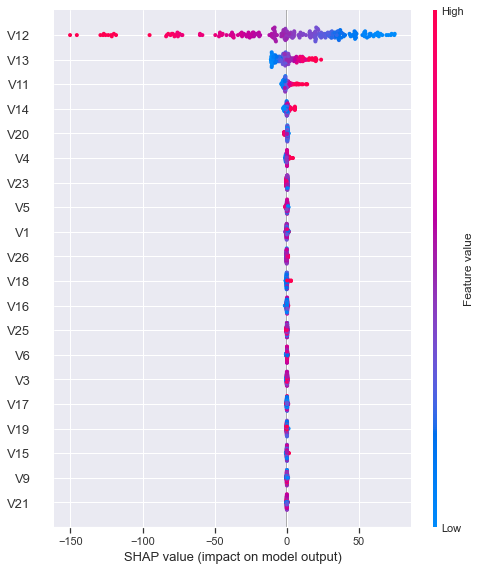

In [116]:
shap.summary_plot(shap_values, X_train)

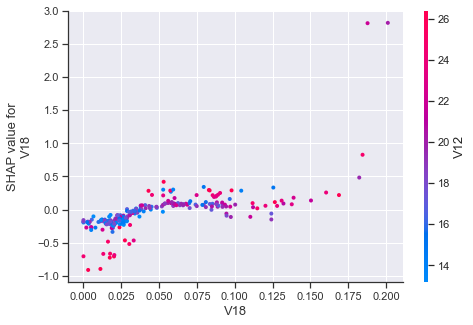

In [117]:
shap.dependence_plot("V18", shap_values, X_train)

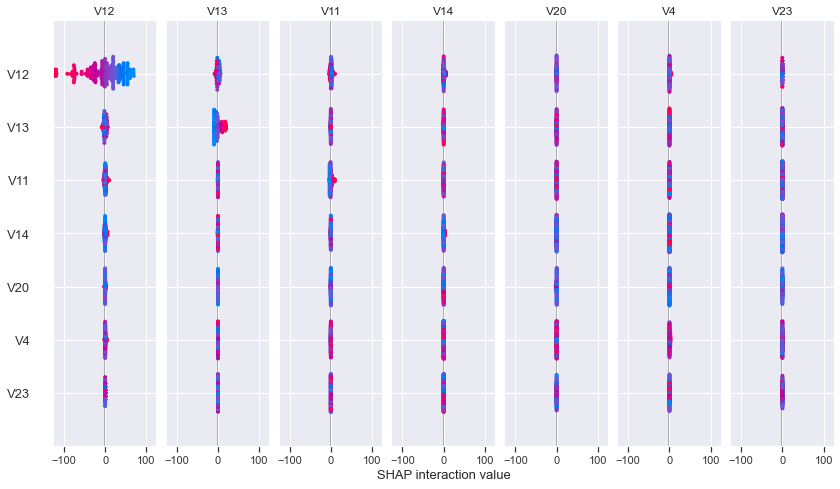

In [118]:
shap_interaction_values = shap.TreeExplainer(mybooster).shap_interaction_values(X_train)
shap.summary_plot(shap_interaction_values, X_train)

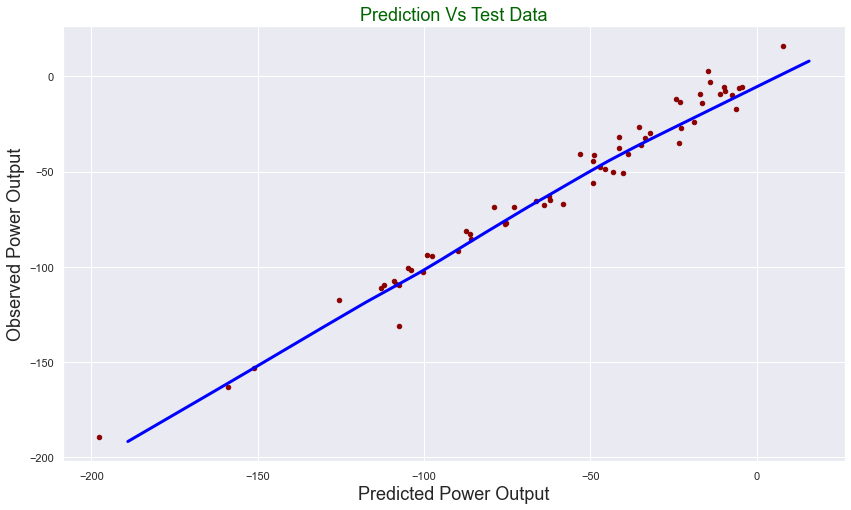

In [119]:
test = pd.DataFrame({"prediction": pred, "observed": y_test})
z = sm.nonparametric.lowess(pred, y_test)
test.plot(figsize = [14,8],
          x ="prediction", y = "observed", kind = "scatter", color = 'darkred')
plt.title("Prediction Vs Test Data", fontsize = 18, color = "darkgreen")
plt.xlabel("Predicted Power Output", fontsize = 18) 
plt.ylabel("Observed Power Output", fontsize = 18)
plt.plot(z[:,0], z[:,1], color = "blue", lw= 3)
plt.show()